<a href="https://colab.research.google.com/github/Sauber59/machine-learning-bootcamp/blob/main/supervised%20/02_regression/03_linear_regression_R2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Preprocessing danych:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Regresja Liniowa przy użyciu scikit-learn](#2)
4. [Wizualizacja graficzna modelu](#3)
5. [Współczynnik $R^{2}$ ](#4)
6. [Końcowa postać modelu](#5)
7. [Regresja z podziałem na zbiór treningowy oraz testowy](#7)
8. [Regresja liniowa - zbiór treningowy - wizualizacja](#8)
9. [Regresja liniowa - zbiór testowy - wizualizacja](#9)
10. [Predykcja na podstawie modelu](#10)


##Import bibliotek

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True, edgeitems=30, linewidth=120,
                    formatter=dict(float=lambda x: f'{x:.2f}'))
sns.set(font_scale=1.3)

##Generowanie danych

In [3]:
from sklearn.datasets import make_regression

data, target = make_regression(n_samples=100, n_features=1, n_targets=1, noise=30, random_state=42) #noise - rozrzut danych

print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (100, 1)
target shape: (100,)


<ipython-input-4-182e5da90d3c>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


[]

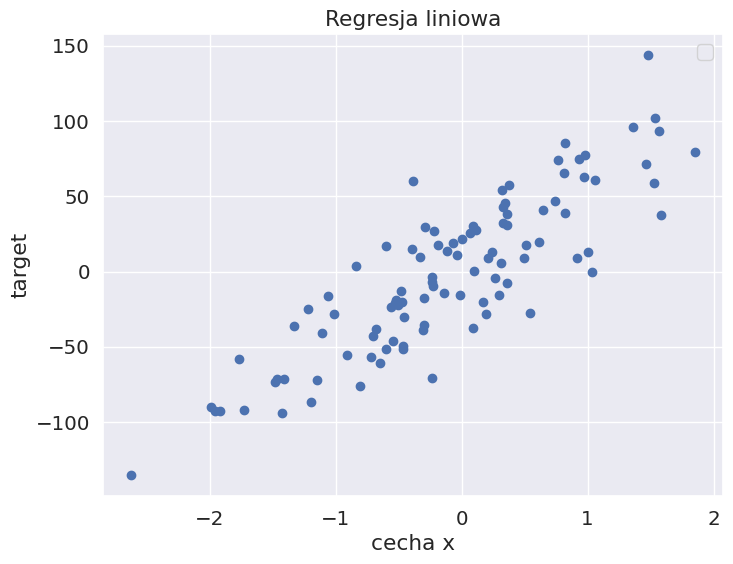

In [4]:
plt.figure(figsize=(8,6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('target')
plt.scatter(data, target) #scattec - typ wykresu punktowy
plt.legend()
plt.plot()

##Regresja liniowa przy użyciu scikit-learn

In [5]:
from sklearn.linear_model import LinearRegression

#dane nie zostaly rozdzielone na treningowe i testow tylko na potrzeby nauki!!!
regression = LinearRegression()

#fit() dopasowuje model liniowy do danych
regression.fit(data, target)

LinearRegression()

In [6]:
#ocena dopasowania modelu (wynik R2 score)
regression.score(data, target)

0.7426670084336404

In [7]:
#predict() dokonuje predykcji na podstawie modelu
y_pred = regression.predict(data)
y_pred[:10]

array([49.90, 7.83, -49.21, 19.15, -20.38, 35.77, -19.60, 30.53, 33.97, 53.50])

##Wizualizacja graficzna modelu z nalozonymi danymi treningowymi

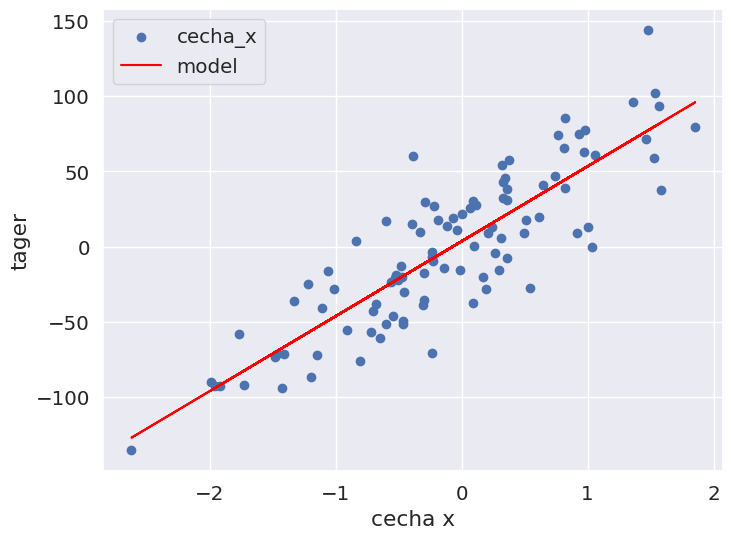

In [8]:
plt.figure(figsize=(8,6))
plt.xlabel('cecha x')
plt.ylabel('tager')
plt.scatter(data, target, label='cecha_x')
plt.plot(data, y_pred, color='red', label='model')
plt.legend()
plt.show()


In [9]:
[item for item in dir(regression) if not item.startswith('_')]

['coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_metadata_routing',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_fit_request',
 'set_params',
 'set_score_request',
 'singular_']

##Regresja z podzialem na zbior treningowy oraz testowy

In [11]:
data, target = make_regression(n_samples=1000, n_features=1, noise=15.0, random_state=42)

print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (1000, 1)
target shape: (1000,)


In [14]:
from sklearn.model_selection import train_test_split

x_train, _test, y_train, y_test = train_test_split(data, target, test_size=0.25)

print(f'X_train shape: {x_train.shape}')
print(f'X_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_train shape: {y_train.shape}')

X_train shape: (750, 1)
X_test shape: (250, 1)
y_train shape: (750,)
y_train shape: (750,)


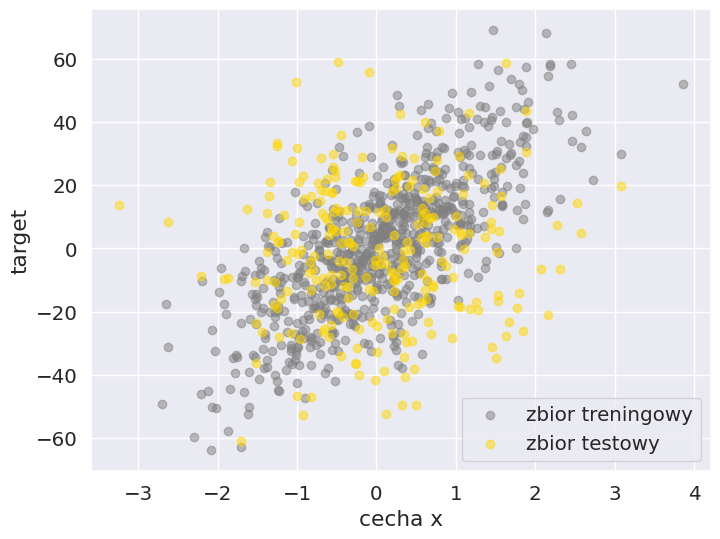

In [15]:
plt.figure(figsize=(8,6))
plt.xlabel('cecha x')
plt.ylabel('target')
plt.scatter(x_train, y_train, label='zbior treningowy', color='gray', alpha = 0.5)
plt.scatter(x_test, y_test, label='zbior testowy', color='gold', alpha = 0.5)
plt.legend()
plt.show()